In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = r'M:\Study Material\Projects & Papers\Traffic Sign Classification (4th Sem)'

In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
fp = r'M:\Study Material\Projects & Papers\Traffic Sign Classification (4th Sem)\my_model.h5'
model.save(fp)

Epoch 1/15
981/981 [==============================] - 75s 75ms/step - loss: 2.5157 - accuracy: 0.3396 - val_loss: 0.9780 - val_accuracy: 0.7359
Epoch 2/15
981/981 [==============================] - 74s 75ms/step - loss: 1.1267 - accuracy: 0.6646 - val_loss: 0.5371 - val_accuracy: 0.8651
Epoch 3/15
981/981 [==============================] - 70s 71ms/step - loss: 0.7740 - accuracy: 0.7672 - val_loss: 0.3593 - val_accuracy: 0.8916
Epoch 4/15
981/981 [==============================] - 69s 70ms/step - loss: 0.5937 - accuracy: 0.8239 - val_loss: 0.2309 - val_accuracy: 0.9329
Epoch 5/15
981/981 [==============================] - 69s 71ms/step - loss: 0.4924 - accuracy: 0.8526 - val_loss: 0.2265 - val_accuracy: 0.9356
Epoch 6/15
981/981 [==============================] - 69s 71ms/step - loss: 0.4490 - accuracy: 0.8680 - val_loss: 0.1928 - val_accuracy: 0.9466
Epoch 7/15
981/981 [==============================] - 70s 71ms/step - loss: 0.4153 - accuracy: 0.8746 - val_loss: 0.1827 - val_accuracy:

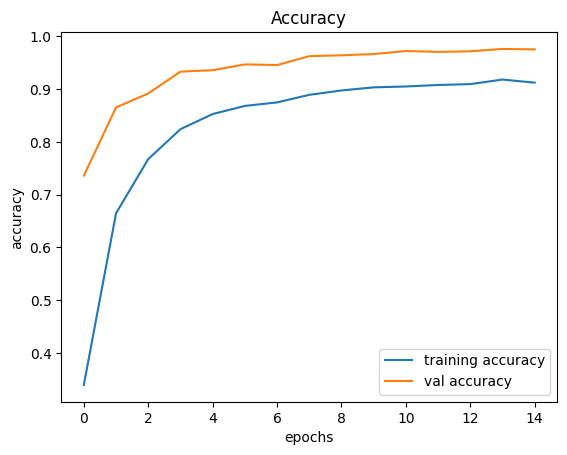

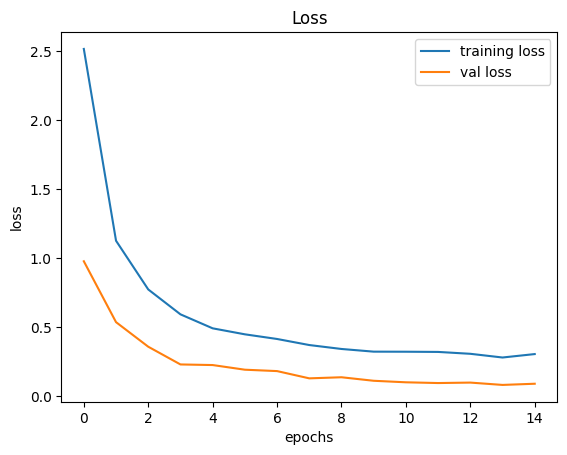

In [9]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred_probabilities = model.predict(X_test)
pred = np.argmax(pred_probabilities, axis=1)

395/395 [==============================] - 5s 11ms/step


In [11]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9332541567695962
